# Modelo de Classificação com Regressão Logística 

## 0.1. Objetivo:

- Identificar os fatores de risco mais relevantes da doença cardíaca coronária, e prever o risco global por meio de regressão logística.

## 0.2. Dados :

    Os dados forma obtidos no Kaggle e estão hospedados no link:
    https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset
    
    É um estudo cardiovascular em andamento em moradores da cidade de Framingham, Massachusetts. O objetivo da classificação é prever se o paciente tem risco de 10 anos de doença coronariana futura (CDH).
    
    
    


## 0.3. Descrição dos Dados:

    O conjunto de dados está disponível publicamente no site Kaggle e é de um estudo cardiovascular em andamento em moradores da cidade de Framingham, Massachusetts. O objetivo da classificação é prever se o paciente tem risco de 10 anos de doença coronariana futura (DAC). O conjunto de dados fornece as informações dos pacientes. Inclui mais de 4.000 registros e 15 atributos.

• sex: masculino = 1 ou feminino = 0 (Nominal)

• age: idade de cada paciente (Contínua)

• currentSmoker: se o paciente é fumante atualamente, fumante = 1 ou não fumante = 0 (Nominal)

• cigsPerDay: o número de cigarros que a pessoa fumou em média em um dia. (Contínua)

• BPMeds: se o paciente estava ou não sob medicação para pressão arterial (Nominal)

• prevalentStroke: se o paciente já teve ou não um acidente vascular cerebral (Nominal)

• prevalentHyp: se o paciente era ou não hipertenso (Nominal)

• diabetes: se o paciente tinha ou não diabetes (Nominal)

• totChol: Nível de colesterol (Contínua)

• sysBP: pressão arterial sistólica (Contínua)

• diaBP: pressão sanguínea diastólica (Contínua)

• BMI: Índice de massa corporal (Contínua)

• heartRate: frequência cardíaca (Contínua)

• glucose: Nível de Glicose (Contínua)

• Predict variable (desired target):

• TenYearCHD: Variável Target,  10 anos de risco de doença cardíaca coronária CHD (binário: “1”, significa “Sim”, “0” significa “Não”)

## 1.0. Imports e Carregamento de Dados:

In [3]:
import os
import pandas                     as pd
import matplotlib.pyplot          as plt
import seaborn                    as sns
import numpy                      as np
import statsmodels.api            as sm

from sklearn.model_selection      import train_test_split
from sklearn.linear_model         import LogisticRegression
from sklearn.preprocessing        import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.metrics              import accuracy_score

pd.options.mode.chained_assignment = None 


In [2]:
# Carregar os dados:
df_raw = pd.read_csv(os.getcwd()+ '/data/framingham.csv')

In [3]:
# Cópia dos dados:
df = df_raw.copy()

In [4]:
# Descartar a variável educação:
df.drop(['education'],axis=1, inplace=True)

In [5]:
# checar por valores faltantes:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# Total dos valores faltantes:
print(f'O total de dados faltantes é de {(df.isnull().sum().sum() / len(df)*100):.2f} % do conjunto de dados.')


O total de dados faltantes é de 12.74 % do conjunto de dados.


In [7]:
# Descartar os valores com valores faltantes:
df.dropna(axis=0,inplace=True)

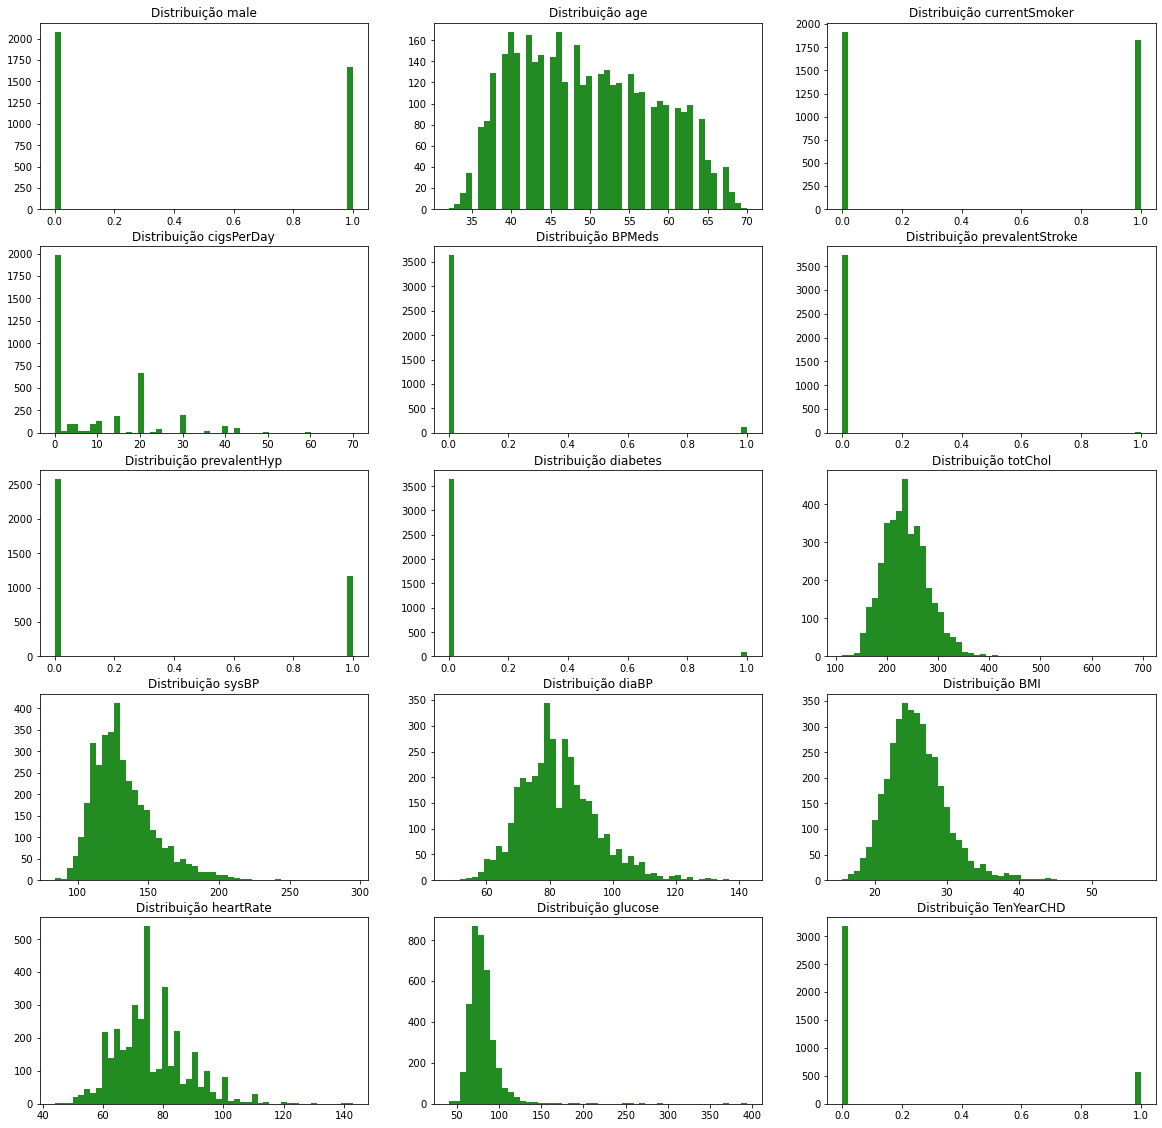

In [8]:
# Análise Exploratória:
def histogramas(dados, features, rows, cols):
    
    fig=plt.figure(figsize=(20,24))
    
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dados[feature].hist(bins=50,ax=ax,facecolor='ForestGreen')
        ax.set_title('Distribuição ' + feature ,color='Black')
        ax.grid(False)
        
    #fig.tight_layout()  
    plt.show()
histogramas(df, df.columns,6,3)

3177 pacientes sem doenças cardíacas

572 pacientes com risco de doença cardíaca coronária



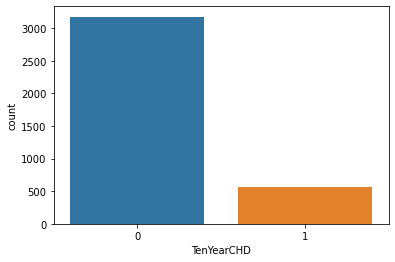

In [9]:
# Distribuição da variável alvo:
sns.countplot(data = df, x= 'TenYearCHD');
print(f'{df.TenYearCHD.value_counts()[0]} pacientes sem doenças cardíacas\n')
print(f'{df.TenYearCHD.value_counts()[1]} pacientes com risco de doença cardíaca coronária\n')

In [52]:
# Dividir os dados em treino e teste:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=1234, stratify= y)

In [53]:
# Rescalar os dados:
standard_scaler = StandardScaler()

max_abs_scaler = MaxAbsScaler()

# Colunas para aplicar os scalers:
continuous_scaler = ['age','sysBP', 'glucose', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'diaBP', ]
nominal_scaler = ['male', 'currentSmoker',  'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

X_train[continuos_scaler] = standard_scaler.fit_transform(X_train[continuos_scaler].values)

X_train[nominal_scaler] = max_abs_scaler.fit_transform(X_train[nominal_scaler].values)

X_test[continuos_scaler] = standard_scaler.fit_transform(X_test[continuos_scaler].values)

X_test[nominal_scaler] = max_abs_scaler.fit_transform(X_test[nominal_scaler].values)

# Adicionar a constante:
X_train = sm.add_constant(X_train)

X_test = sm.add_constant(X_test)


In [54]:
# Criar o modelo:
reg_log = sm.Logit(y_train, X_train)

reg_log = reg_log.fit() # treinar modelo
reg_log.summary()       # estatísticas

Optimization terminated successfully.
         Current function value: 0.373394
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2624
Model:                          Logit   Df Residuals:                     2609
Method:                           MLE   Df Model:                           14
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.1254
Time:                        03:10:48   Log-Likelihood:                -979.79
converged:                       True   LL-Null:                       -1120.2
Covariance Type:            nonrobust   LLR p-value:                 1.130e-51
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8474      0.840    -10.527      0.000     -10.495      -7.200
male                0.2731      0.072      3.785      0.000       0.132       0.415
age                 0.0733      0.008      9.204      0.000       0.058       0.089
currentSmoker      -0.0224      0.097     -0.233      0.816      -0.212       0.167
cigsPerDay          0.0234      0.008      3.104      0.002       0.009       0.038
BPMeds              0.1589      0.269      0.590      0.555      -0.369       0.687
prevalentStroke     0.0575      0.820      0.070      0.944      -1.550       1.665
prevalentHyp        0.1959      0.113      1.739      0.082      -0.025       0.417
diabetes            0.1568      0.353      0.445      0.657      -0.534       0.848
totChol             0.0021      0.001      1.651      0.099      -0.000       0.005
sysBP               0.0123      0.004      2.741      0.006       0.003       0.021
diaBP              -0.0029      0.008     -0.383      0.702      -0.018       0.012
BMI                 0.0204      0.015      1.365      0.172      -0.009       0.050
heartRate           0.0009      0.005      0.183      0.855      -0.009       0.011
glucose             0.0061      0.003      2.394      0.017       0.001       0.011
===================================================================================
"""

In [55]:
# previsão com o modelo:
yhat = reg_log.predict(X_test)

# Predições:
yhat = list(map(round, yhat))

print(f'O Modelo com todas as variáveis tem uma acurácia de: {accuracy_score(y_test,yhat)*100:.2f}% nos dados de teste.')

O Modelo com todas as variáveis tem uma acurácia de: 85.07% nos dados de teste.


In [56]:
# Usar as variáveis significativas (5%) para previsão no conjunto de testes:
cols_significativas = ['const', 'male', 'age', 'cigsPerDay', 'sysBP', 'glucose']

In [57]:
# Criar o modelo:
reg_log2 = sm.Logit(y_train, X_train[cols_significativas])

reg_log2 = reg_log2.fit() # treinar modelo
reg_log2.summary()       # estatísticas

Optimization terminated successfully.
         Current function value: 0.375168
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2624
Model:                          Logit   Df Residuals:                     2618
Method:                           MLE   Df Model:                            5
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.1212
Time:                        03:10:50   Log-Likelihood:                -984.44
converged:                       True   LL-Null:                       -1120.2
Covariance Type:            nonrobust   LLR p-value:                 1.285e-56
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7673      0.496    -17.673      0.000      -9.740      -7.795
male           0.2610      0.070      3.750      0.000       0.125       0.397
age            0.0752      0.008      9.837      0.000       0.060       0.090
cigsPerDay     0.0219      0.005      4.386      0.000       0.012       0.032
sysBP          0.0171      0.003      6.739      0.000       0.012       0.022
glucose        0.0071      0.002      3.687      0.000       0.003       0.011
==============================================================================
"""

In [58]:
# previsão com o modelo:
yhat2 = reg_log2.predict(X_test[cols_significativas])

# Predições:
yhat2 = list(map(round, yhat2))

print(f'O Modelo com as variáveis significativas tem uma acurácia de: {accuracy_score(y_test,yhat2)*100:.2f}% nos dados de teste.')

O Modelo com as variáveis significativas tem uma acurácia de: 84.89% nos dados de teste.


In [59]:
# Converter os coeficientes para Odds-Ratio, obter os intervalos de confiaça e o p-valor:
params = np.exp(reg_log2.params)
conf = np.exp(reg_log2.conf_int())
conf['coefic'] = reg_log2.params
conf['OR'] = params
pvalue = round(reg_log2.pvalues,4)
conf['pvalue']= pvalue
conf.columns = ['Coeficientes',  'Odds Ratio', 'CI 95%(2.5%)', 'CI 95%(97.5%)','p-valor']


In [60]:
conf

,Coeficientes,Odds Ratio,CI 95%(2.5%),CI 95%(97.5%),p-valor
const,0.000059,0.000412,-8.767273,0.000156,0.0000
male,1.132688,1.487980,0.261006,1.298236,0.0002
age,1.062068,1.094378,0.075202,1.078102,0.0000
cigsPerDay,1.012198,1.032220,0.021918,1.022160,0.0000
sysBP,1.012200,1.022318,0.017100,1.017247,0.0000
glucose,1.003310,1.010866,0.007056,1.007081,0.0002


## Interpretação dos resultados do modelo:

### Avaliando a variável explicativa: male

    Mantendo todas as demais variáveis constantes, o resultado do modelo mostra que a probabilidade de desenvolver uma doença cardíaca para homens (male = 1) sobre as mulheres (male = 0) é de 1.487980
    Em termos de probabilidade as chances para homens são 48.79% maiores do as chances para mulheres.
    
    

### Avaliando a variável explicativa: age

    Para a variável explicativa idade, a razão de chances nos diz que 
    
    O coeficiente para a idade diz que, mantendo todos os outros constantes, veremos um aumento de 9.43% nas chances de ser     diagnosticado com CDH para um aumento de um ano na idade.

### Avaliando a variável explicativa: cigsPerDay

    Mantendo as demais variáveis constantes, a cada cigarro consumido, ocorre um aumento de 3.22% nas chances de               desenvolver doença cardíaca coronária.

### Avaliando a variável explicativa: sysBP

    Um aumento na unidade de pressão arterial sistólica, mantido tudo ou mais constante, leva um aumento de 2.23% nas           chances de desenvolver doença cardíaca coronária.

### Avaliando a variável explicativa: glucose

    Um aumento na unidade de glicose eleva em 1.08% as chances de desenvolver doença cardíaca coronária.